In [1]:
#install PyPDF2 library
! pip install PyPDF2
#install nltk library
! pip install nltk==3.5
#install matplotlib library
! pip install numpy matplotlib
#install spell checker library
! pip install pyenchant
#install jason library
! pip install json
#install YAKE library for automatic key phrase extraction
! pip install yake
#install library to exrace the header and footer from the text
! pip install PyMuPDF
#install library to keyBert
! pip install keybert
#install keywordvectorizer
! pip install keyphrase_vectorizers


  Using cached nltk-3.5-py3-none-any.whl
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keyphrase-vectorizers 0.0.11 requires nltk>=3.6.1, but you have nltk 3.5 which is incompatible.


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Meta data of the PDF
Total number of pages in the PDF file is:  4
Author name: None
Creator name: None
Producer name: None

Removed Header:
AGILE: GIScience Series, 4, 19, 2023. https://doi.org/10.5194/agile-giss-4-19-2023 
Proceedings of the 26th AGILE Conference on Geographic Information Science, 2023. 
Editors: P. van Oosterom, H. Ploeger, A. Mansourian, S. Scheider, R. Lemmens, and B. van Loenen. 
This contribution underwent peer review based on a full paper submission. 
© Author(s) 2023. This work is distributed under the Creative Commons Attribution 4.0 License

Removed Footers:
AGILE: GIScience Series, 4, 19, 2023 | https://doi.org/10.5194/agile-giss-4-19-2023
AGILE: GIScience Series, 4, 19, 2023 | https://doi.org/10.5194/agile-giss-4-19-2023
AGILE: GIScience Series, 4, 19, 2023 | https://doi.org/10.5194/agile-giss-4-19-2023


DOI of the paper:
https://doi.org/10.5194/agile-giss-4-19-2023

TITLE OF THE DOCUMENT 
 Using Machine Learning to drive social learning in a Covid 19 Agen

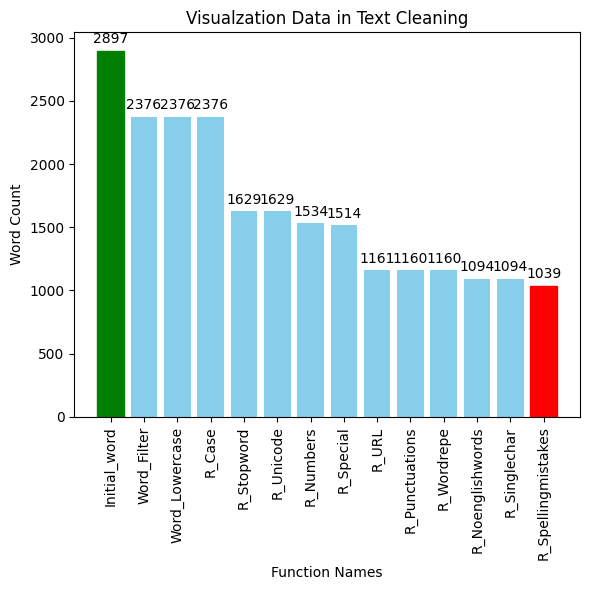


List of EO4GEO BOK concept:
 ['Analytical Methods', 'Foundations of analytical methods', 'Analytical approaches', 'Data mining', 'Problems of large spatial databases', 'Data mining approaches', 'Knowledge discovery', 'Network analysis', 'Networks defined', 'Graph theoretic descriptive measures of networks', 'Least-cost shortest path', 'Flow modeling', 'The Classic Transportation Problem', 'Other classic network problems', 'Accessibility modeling', 'Optimization and location-allocation modeling', 'Operations research modeling and location modeling principles', 'Linear programming', 'Integer programming', 'Location-allocation modeling and p-median problems', 'Representation transformation', 'Impacts of transformations', 'Data model and format conversion', 'Interpolation', 'Vector-to-raster and raster-to-vector conversions', 'Raster resampling', 'Coordinate transformations', 'Generalization and aggregation', 'Scale and generalization', 'Approaches to point, line, and area generalization'

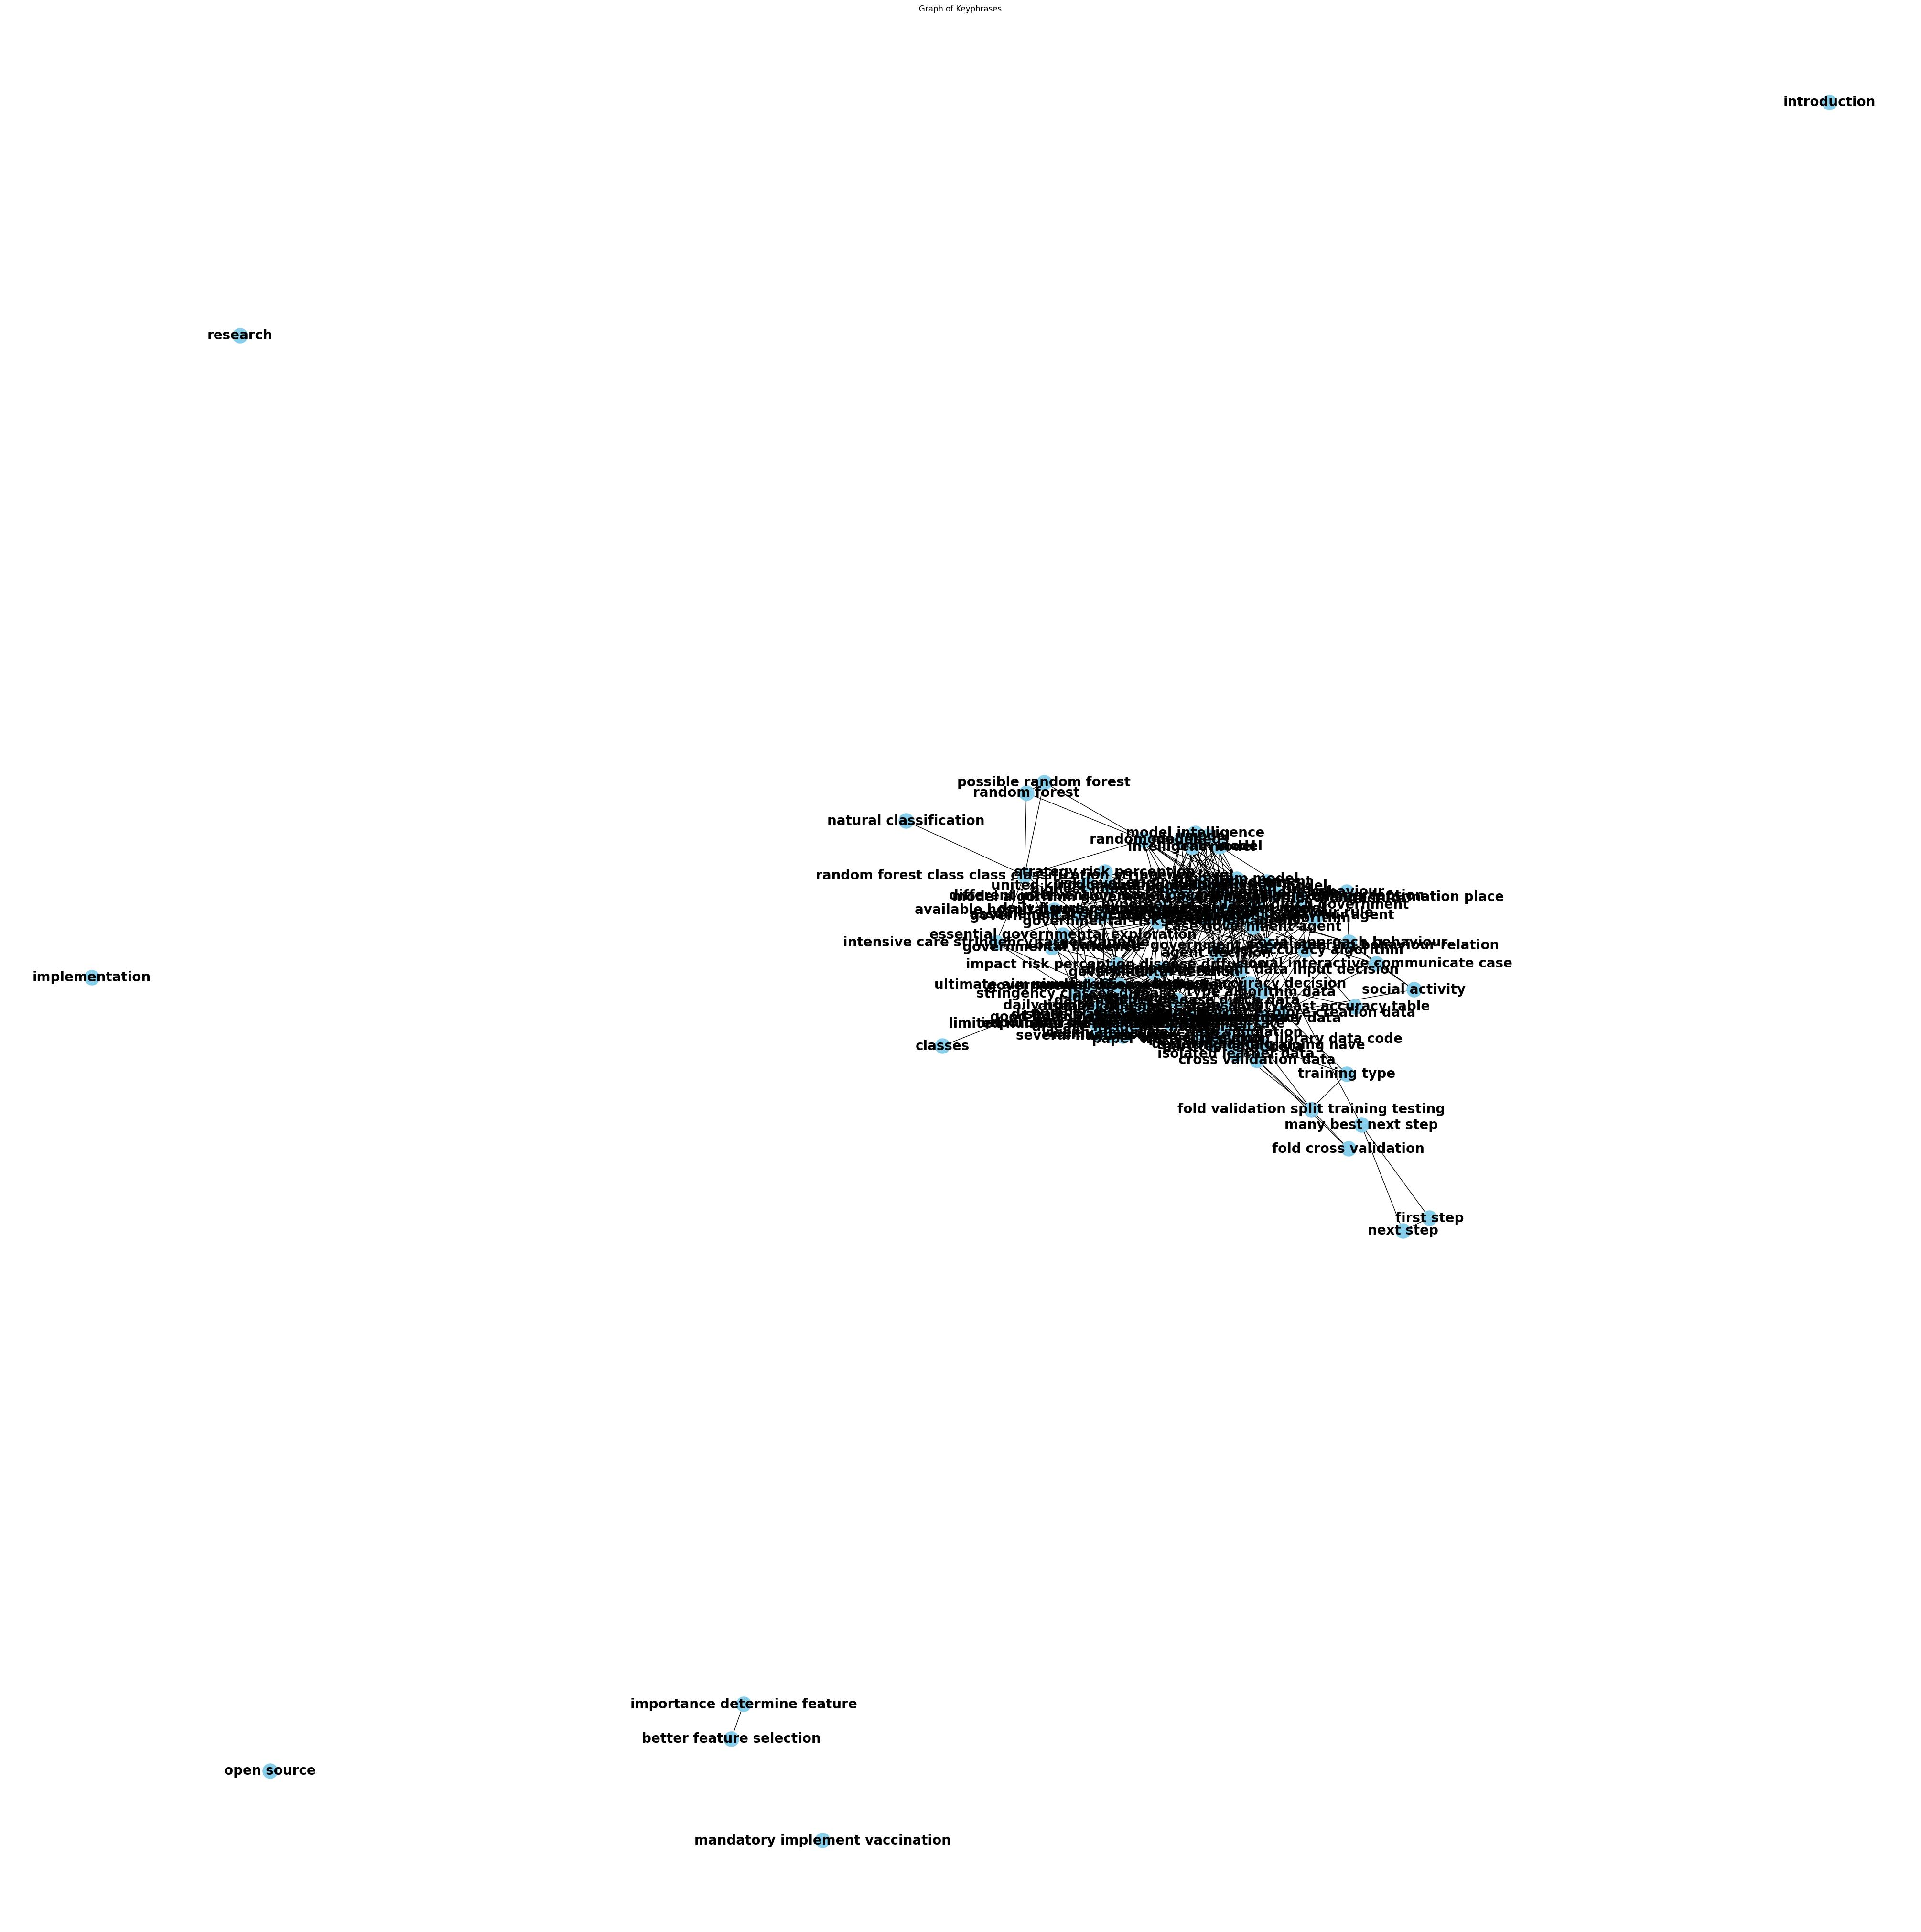

Total similarity measures above the threshold: 4
Similarity between 'Random forest (RF)' and 'random forest': 0.9625
Similarity between 'Introduction to GML' and 'introduction': 0.95
Similarity between 'Introduction to CityGML' and 'introduction': 0.92
Similarity between 'XML introduction' and 'introduction': 0.9166666666666666

List of EO4GEO BOK concepts above the threshold:

{'Introduction to GML', 'XML introduction', 'Introduction to CityGML', 'Random forest (RF)'}

Total number of EO4GEO BOK concepts match to given pdf:
 4

Frequency of each similarity measure above the threshold:
Random forest (RF): 1
Introduction to GML: 1
Introduction to CityGML: 1
XML introduction: 1


In [1]:
# IMPORT REQUIRD LIBRARIES 

import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
import enchant
import json
import string
import networkx as nx
import fitz 
from PyPDF2 import PdfReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
# This is the function for automate the annotation PDF resources with EO4GEOBOK concepts

# This function (PATTERNRANK_JAROW) contains main 05 functions
      # a. Text cleaning function --> Text_Cleaner()
      # b. Automatic extracion of list of BOK concept  --> EO4GEO()
      # c. Automatic Key phrases extraction from text given by PDF --> PATTERNRANK_Extractor()
      # d. Similarity measurement between extracted key phrases and EO4GEO concepts --> JaroW_Similarity
      # e. Download output results as a JSON format --> Create_Json()
      
def PATTERNRANK_JAROW(pdf):
      
# 01. FUNCTION FOR TEXT CLEANING  
   
   global corrected_words
   corrected_words = []

   def Text_Cleaner():
   # 1. Function to show metadata of the PDF
      def metaData(pdf):
         reader = PdfReader(pdf)
         meta = reader.metadata
         print("Meta data of the PDF")
         print("Total number of pages in the PDF file is: ", len(reader.pages))
         print("Author name:", meta.author)
         print("Creator name:", meta.creator)
         print("Producer name:", meta.producer)
      metaData(pdf)
   #-----------------------------------------------------------------------------------
   # 2. Remove footers from the text
      def remove_Singlelines(text):
         pattern = r'AGILE: GIScience Series.*?https://doi\.org/[^\s]+'
         matches = re.findall(pattern, text)
         removed_text = ""
         for match in matches:
            removed_text += match + "\n"
            text = text.replace(match, '')
         return removed_text, text.strip()
      
      global http_sections
      http_sections = ""
      
   # 3. Remove headers from the text
      def remove_Agilelicense(text):
         pattern = r'AGILE: GIScience Series.*?This work is distributed under the Creative Commons Attribution 4.0 License'
         match = re.search(pattern, text, flags=re.DOTALL)
         removed_text = ""
         global http_sections
         if match:
            removed_text = match.group(0)
            text = text.replace(removed_text, '')
            http_pattern = re.compile(r'https?://doi\.org/[^\s]+')
            http_matches = re.findall(http_pattern, removed_text)
            http_sections += " ".join(http_matches)
         return removed_text, text.strip(),http_sections

      def extract_Agileinfo(pdf_path):
         doc = fitz.open(pdf_path)
         agile_info = ""
         inagile_section = False

         for page_number in range(doc.page_count):
            page = doc[page_number]
            text = page.get_text("text")
            
            if "AGILE: GIScience Series" in text:
               inagile_section = True
               agile_info += text

            elif inagile_section and "© Author(s)" in text:
               agile_info += text
               inagile_section = False
               break
            
            elif inagile_section:
               agile_info += text

         doc.close()
         return agile_info.strip()

      pdf_path = pdf
      extracted_info = extract_Agileinfo(pdf_path)
      reagile_part, cleanedtext_agile,http_sections = remove_Agilelicense(extracted_info)
      resingle_lines, cleanedtext_all = remove_Singlelines(cleanedtext_agile)
      print("\nRemoved Header:")
      print(reagile_part)
      print("\nRemoved Footers:")
      print(resingle_lines)
      print("\nDOI of the paper:")
      print(http_sections)
   #----------------------------------------------------------------------------------------
   # 4. Remove hyphens within words
      def remove_Hypens(text):
         stringwithout_hyp = text.replace('-', ' ')
         return stringwithout_hyp
      withouthypen = remove_Hypens(cleanedtext_all)
   #--------------------------------------------------------------------------------------
   # 5.Tokenization - split the entire paragraph into words (tokens)
      def token_Words(text):
         list_words = word_tokenize(text)
         return list_words
      split_words = token_Words(withouthypen)
   #---------------------------------------------------------------------------------------
   # 6.Filterd the required portion
      def split_Portion(para):
         index1 = para.index('Abstract')
         index2 = para.index('References')
         filter_potion=para[index1+1:index2]
         return filter_potion
      filter = split_Portion(split_words)
   #-----------------------------------------------------------------------------------------
   # 7.Extract the title ofthe document
      global title
      def title_Ex(word_list):
         index3 = word_list.index('Abstract')
         title = word_list[0:index3]
         separator = ' ' 
         result = separator.join(title) 
         return result
      title = title_Ex(split_words)
   #---------------------------------------------------------------------------------------
   # 8. Convert words in to lowercases
      def lowercase_Words(list):
         lowercase_remain =[]
         for i in list:
            x = i.lower()
            lowercase_remain.append(x)
         return lowercase_remain
      lower_words = lowercase_Words(filter)
   #------------------------------------------------------------------------------------------
   # 9. Remove cases.Remove some words and letters which are not in English language
      def remove_Case(text_remain):
         cleaned_texts =[]
         for text in text_remain:
            text = text.casefold()
            cleaned_texts.append(text)
         return cleaned_texts
      Rem_cases = remove_Case(lower_words)
   #----------------------------------------------------------------------------------------
   # 10. Remove Stop words in English language
      def remove_Stopword(cleaned_texts):
         stop_words = stopwords.words('english')
         stopword_list = []
         nostopword_list = []
         for word in cleaned_texts:
            if word in stop_words:
               stopword_list.append(word)
            elif word not in stop_words:
               nostopword_list.append(word)
         return nostopword_list
      Rem_stopwords = remove_Stopword(Rem_cases) 
   #-----------------------------------------------------------------------------------------
   # 11.Remove unicode symbols from the text
      def remove_Unicode(nostop_word):
         no_unicode = []
         for word in nostop_word:
            cleaned_word = re.sub(r'[^\x00-\x7F]+', '', word)
            no_unicode.append(cleaned_word)
         return no_unicode
      Rem_unicodes = remove_Unicode(Rem_stopwords)
   #-------------------------------------------------------------------------------------------
   # 12. Remove numbers and digits
      def remove_Numbers(nounicode_list):
         no_number_list = []
         number_list = []
         for token in nounicode_list:
            if token.isdigit():
               number_list.append(token)  
            elif token.count('.') == 1 and token.replace('.', '').isdigit():
               number_list.append(token) 
            else:
               no_number_list.append(token) 
         return no_number_list
      Rem_numbers = remove_Numbers(Rem_unicodes) 
   #-------------------------------------------------------------------------------------------
   # 13. Remove special words with having mix of string, numbers, punctuations and other symbols
      def remove_Special(nospecial_list):
         no_sp_words = []
         num_string_list = []
      # Regular expression pattern to match any string containing numeric characters or hyphens
         pattern = r'^(?=.*\d)(?=.*[A-Za-z])|(?=.*[A-Za-z])(?=.*[\W_])|(?=.*\d)(?=.*[\W_])'
         for text in nospecial_list:
            if not re.match(pattern, text):
               no_sp_words.append(text)
            elif re.match(pattern, text):
               num_string_list.append(text) 
         return no_sp_words
      Rem_special = remove_Special(Rem_numbers)
   #---------------------------------------------------------------------------------------
   # 14. remove URL, @
      def remove_Repeat(nosp_words):
         list1 = []
         list2 = []
         text1 = r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
         for i in nosp_words:
            if not re.match(text1, i):
               list1.append(i)
            elif re.match(text1, i):
               list2.append(i)
         return list1
      Rem_url = remove_Repeat(Rem_special)
   #---------------------------------------------------------------------------------------
   # 15.Remove punctuations from the list
      def remove_Punc(cleaned_words):
         punctuation_marks=[]
         without_punct_marks=[]
         for token in cleaned_words:
            if token in ("!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"):
               punctuation_marks.append(token)
            elif token not in ("!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"):
               without_punct_marks.append(token)
         return without_punct_marks
      Rem_punc = remove_Punc(Rem_url)
   #----------------------------------------------------------------------------------------
   # 16. Remove word repetition
      def word_Repeti(list):
         pattern = re.compile(r'\b\w*(\w)\1{3,}\w*\b')
         filtered_word_list =[]
         for word in list:
            if not pattern.search(word):
               filtered_word_list.append(word)
         return filtered_word_list
      Rem_repeat = word_Repeti(Rem_punc)
   #------------------------------------------------------------------------------------------
   # 17.Remove single characters and non-English words  
      def rem_Noenglish(filtered_word):
         english_words = set(words.words())
         filtered_words = []
         for word in filtered_word:
            if len(word) > 4: 
               filtered_words.append(word)
            elif word.lower() in english_words:
               filtered_words.append(word)
            else:
               continue
         return filtered_words
      Rem_noenglish = rem_Noenglish(Rem_repeat)
   #-------------------------------------------------------------------------------------------
   # 18. Remove single-character 
      def remsingle_Words(word_list):
         new_list = []
         other = []
         for word in word_list:
            if len(word) > 1:
               new_list.append(word)
            else:
               other.append(word)
         return new_list
      Rem_single = remsingle_Words(Rem_noenglish)
   #-----------------------------------------------------------------------------------------
   # 19. Remove words with spelling mistakes
      def spelling_Check(word_list):
         spell_checker = enchant.Dict("en")
         global corrected_words 
         for word in word_list:
            if spell_checker.check(word):
               corrected_words.append(word)
         return corrected_words
      corrected_words = spelling_Check(Rem_single )
   #----------------------------------------------------------------------------------------
   # 20. Calculations
      def calculation():
         initial_words = len(split_words)
         total_words = len(filter)
         final_words = len(corrected_words)
         Remain_percentage = (final_words / total_words) * 100
         print("\nTITLE OF THE DOCUMENT \n",title)
         print("\nText Cleaning Results")
         print("Total number of words before split the portion is", initial_words)
         print("Total number of words after split the portion (Abstract to Refrence) is", total_words)
         print("Total number of words after text cleaning is", final_words)
         print("The remaining percentage of the words is", round(Remain_percentage, 2), "%")
      calculation()
   #--------------------------------------------------------------------------------------------
   # 21. Make a data frame for text cleaning steps
      def dataFrame():
         a = len(split_words)
         b = len(filter)
         c = len(lower_words)
         d = len(Rem_cases)
         e = len(Rem_stopwords)
         f = len(Rem_unicodes)
         g = len(Rem_numbers)
         h = len(Rem_special)
         i = len(Rem_url)
         j = len(Rem_punc)
         k = len(Rem_repeat)
         l = len(Rem_noenglish)
         m = len(Rem_single)
         n = len(corrected_words)
    
         function_names = ["Initial_word", "Word_Filter","Word_Lowercase","R_Case", "R_Stopword","R_Unicode", "R_Numbers", "R_Special","R_URL" ,"R_Punctuations","R_Wordrepe","R_Noenglishwords","R_Singlechar","R_Spellingmistakes"]
         word_counts = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]
         df = pd.DataFrame({"Function Name": function_names, "Word Count": word_counts})
         print(df)
         return df
      table = dataFrame()
   #-------------------------------------------------------------------------------------
   # 22. Plot a graph
      def plot_Bargraph(df):
         plt.figure(figsize=(6,6))
         bars = plt.bar(df["Function Name"], df["Word Count"], color='skyblue')
         plt.xlabel('Function Names')
         plt.ylabel('Word Count')
         plt.title('Visualzation Data in Text Cleaning')
         plt.xticks(rotation=90)
      # maximum and minimum values of x values
         max_idx = df["Word Count"].idxmax()
         min_idx = df["Word Count"].idxmin()
      # Highlight the maximum and minimum values 
         bars[max_idx].set_color('green')
         bars[min_idx].set_color('red')
      # Labeling the bars with their respective values
         for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height}',xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),  textcoords="offset points",ha='center', va='bottom')
         plt.tight_layout()
         plt.show()
      plot_Bargraph(table)
   Text_Cleaner()
   
#///////////////////////////////////////////////////////////////////////////////////////////////

# 02. FUNCTION FOR AUTOMATE THE EXTRACTION THE LIST OF EO4GEO BOK CONCEPT AND PRE-PROCSEESING THE EXTRATED LIST
   
   global title
   global cleaned_list
   cleaned_list =[]
   global concept_names
   concept_names = []
   
   def EO4GEO():
   # 1. automatic list of BOK concept extraction using jason file
      with open('Data.json', 'r', encoding='utf-8') as json_file:
         data = json.load(json_file)
      def EO4GEOlist_extractor(data):
      # Open and load the JSON file with UTF-8 encoding
         names = []
         for key, value in data.items():
            if isinstance(value, dict):
               if 'name' in value:
                  names.append(value['name'])
                  names.extend(EO4GEOlist_extractor(value))
         return names
      global concept_names
      concept_names = EO4GEOlist_extractor(data)
      print("\nList of EO4GEO BOK concept:\n", concept_names)
      print("\nLength of the list of EO4GEO BOK \n",len(concept_names))
   #------------------------------------------------------------------------------------------
   # 2. Convert lower case in the words and phrass in the list
      def lower_EO4GEO(list):
         lst = []
         for x in list:
            x = x.lower()
            lst.append(x)
         return lst
      lower_list = lower_EO4GEO(concept_names)
   #----------------------------------------------------------------------------------------
   # 3. Remove stop words from an element
      def remove_Stopwords(element):
         words = element.split()
         filtered_words = []
         for word in words:
            if word.lower() not in stopwords.words('english'):
               filtered_words.append(word)
         return ' '.join(filtered_words)
      
      remove_stop = []
      for element in lower_list:
         cleaned_element = remove_Stopwords(element)
         remove_stop.append(cleaned_element)
   #------------------------------------------------------------------------------------------
   # 4. Remove punctuations for the elements in the list
      def process_Word(word):
         word = word.replace('-', ' ')
         word = word.replace(',', ' ')
         word = word.replace('/', ' ')
         word = word.replace(':', ' ')
         word = word.replace('()', ' ')
         word = word.replace("'", '')
   
         wordnoPunctuation = ""
         for char in word:
            if char not in string.punctuation:
               wordnoPunctuation += char
         return wordnoPunctuation
   
      processed_lst = []
      for word in remove_stop:
         processed_lst.append(process_Word(word))
   #-----------------------------------------------------------------------------------------
   # 4. Remove extra white spaces
      def clean_Strings(list):
         global cleaned_list
         for element in list:
            cleaned_element = ' '.join(element.split())
            cleaned_list.append(cleaned_element)
         return cleaned_list
      clean_Strings(processed_lst)
      print("\nList of EO4GEO BOK concept after doing text cleaning:\n", cleaned_list)
   EO4GEO()
   
   EO4GEOBOK_keyphrases = cleaned_list
   
#///////////////////////////////////////////////////////////////////////////////////////////////

# 03. FUNCTION FOR AUTOMATIC KEY PHRASE EXTRACTION USING PATTERNRANK ALGORITHM
   global x
   x = print("\nText from PDF after text cleaning\n", corrected_words)
   global PatternRank_kp
   PatternRank_kp =[]
   PATTERN_keyphrases = PatternRank_kp
#-----------------------------------------------------------------------------------  
   def PATTERNRANK_Extractor():
         def patternRank_extractor(text_document):
      # Join the text into a single string
            text_final = ' '.join(text_document)
      
      # Tokenize the text
            words = set(nltk.corpus.words.words())
            tokens = nltk.wordpunct_tokenize(text_final)
            filtered_tokens = [w for w in tokens if w.lower() in words or not w.isalpha()]
            x = " ".join(filtered_tokens)
      
      # Extract keyphrases
            kw_model = KeyBERT()
            key_phrases = kw_model.extract_keywords(docs=x, vectorizer=KeyphraseCountVectorizer(), top_n=100)
            print("Extracted keyphrases from PatternRank with socres: \n",key_phrases)
      
            global PatternRank_kp
            for i,j in key_phrases:
               PatternRank_kp.append(i)
            print("Extracted keyphrases from PatternRank without socres: \n",PatternRank_kp)
            return PatternRank_kp
      
         kp_list = patternRank_extractor(corrected_words)
#----------------------------------------------------------------------------------------------
# 2. Create a co-occurrence graph
         def cooccurrence_graph(keyphrases):
            G = nx.Graph()

            for i in keyphrases:
               G.add_node(i)

      # Calculate co-occurrence relationships
            for phrase1 in keyphrases:
               for phrase2 in keyphrases:
                  if phrase1 != phrase2:
                     shared_words = set(phrase1.split()) & set(phrase2.split())
                     if shared_words:
                        G.add_edge(phrase1, phrase2)

            pos = nx.spring_layout(G, seed=30)
            plt.figure(figsize=(40, 40))
            nx.draw(G, pos, with_labels=True, node_size=500, font_size=20, font_color='black', font_weight='bold', node_color='skyblue')
            plt.title("Graph of Keyphrases")
            plt.show()
         
         cooccurrence_graph(kp_list)
   PATTERNRANK_Extractor()

#///////////////////////////////////////////////////////////////////////////////////////////////

# 04. FUNCTION FOR SIMILARITY MEASURES USING JARO WINKLER SIMILARITY MEASURES
   global above_threshold
   above_threshold = set()
   
   def jarowinkler_similarity(list1, list2, threshold):
      mapdict_Cleanedlist = dict(zip(cleaned_list, concept_names))
    # Jaro Similarity of two strings
      def jaro_distance(s1, s2):
         if s1 == s2:
            return 1.0
         len1 = len(s1)
         len2 = len(s2)

         if len1 == 0 or len2 == 0:
            return 0.0

         max_dist = (max(len1, len2) // 2) - 1

         match = 0
         hash_s1 = [0] * len1
         hash_s2 = [0] * len2

         for i in range(len1):
            for j in range(max(0, i - max_dist), min(len2, i + max_dist + 1)):
               if s1[i] == s2[j] and hash_s2[j] == 0:
                  hash_s1[i] = 1
                  hash_s2[j] = 1
                  match += 1
                  break

         if match == 0:
            return 0.0

         t = 0
         point = 0

         for i in range(len1):
            if hash_s1[i]:
               while hash_s2[point] == 0:
                  point += 1
               if s1[i] != s2[point]:
                  point += 1
                  t += 1
               else:
                  point += 1

         t /= 2

         return ((match / len1 + match / len2 + (match - t) / match) / 3.0)

    # Jaro Winkler Similarity

      global concept_name
      phrase1_frequency = {}
      
      def jaro_Winkler(s1, s2):
         jaro_dist = jaro_distance(s1, s2)

         if jaro_dist > 0.7:
            prefix = 0
            for i in range(min(len(s1), len(s2))):
               if s1[i] == s2[i]:
                  prefix += 1
               else:
                  break

            prefix = min(4, prefix)
            jaro_dist += 0.1 * prefix * (1 - jaro_dist)

         return jaro_dist

      similarity_matrix = [[jaro_Winkler(str1, str2) for str2 in list2] for str1 in list1]
      countabove_threshold = 0
      similarity_list = []

# Collect the similarity values along with their corresponding indices
      for i, row in enumerate(similarity_matrix):
         for j, similarity in enumerate(row):
            if similarity > threshold:
               concept_name = mapdict_Cleanedlist[list1[i]]
               similarity_list.append((concept_name, list2[j], similarity))
               countabove_threshold += 1

# Sort the similarity list by similarity values
      similarity_list.sort(key=lambda x: x[2],reverse=True)

      print(f"Total similarity measures above the threshold: {countabove_threshold}")
      
      for concept_name, str2, sim in similarity_list:
         above_threshold.add(concept_name)
         print(f"Similarity between '{concept_name}' and '{str2}': {sim}")

      print("\nList of EO4GEO BOK concepts above the threshold:\n")
      print(above_threshold)
      print("\nTotal number of EO4GEO BOK concepts match to given pdf:\n", len(above_threshold))
      print("\nFrequency of each similarity measure above the threshold:")

      phrase1_frequency = {}
      for concept_name, _,sim in similarity_list:
         phrase1_frequency[concept_name] = phrase1_frequency.get(concept_name, 0) + 1

      for concept_name, frequency in phrase1_frequency.items():
         print(f"{concept_name}: {frequency}")

   threshold = 0.9
   jarowinkler_similarity(EO4GEOBOK_keyphrases,PATTERN_keyphrases, threshold)
   
#///////////////////////////////////////////////////////////////////////////////////////////////

# 05. FUNCTION FOR CREATE JSON FILE TO DOWNLOAD FINAL OUTPUTS GIVEN BY PROPOSED TOOL

   def Create_Json(doi, title,concepts):
      output_data = {
        "DOI": doi,
        "Title": title,
        "Concepts": list(concepts)
      }

      json_filename = "JSON_PATTERNRNAKJAROW.json"

      with open(json_filename, 'w') as json_file:
         json.dump(output_data, json_file, indent=4)

   DOI = http_sections
   TITLE =title
   CONCEPTS = above_threshold

   Create_Json(DOI, TITLE, CONCEPTS)

PATTERNRANK_JAROW('Augustijn-FULL_feedback.pdf')

